### 행정도별 소비소득 분석
- 소비유형별 소비소득을 분석하여 행정도분석

In [1]:
import pandas as pd

In [2]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
pay=pd.read_csv('data/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')

In [4]:
# null값 확인
pd.DataFrame(pay).isnull().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64

In [5]:
# 2022년도 내용추출
pay.set_index('기준_년분기_코드',inplace=True)
pay1 = pay.loc[[20221,20222,20223,20224]]
pay1.tail(3)

,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
기준_년분기_코드,,,,,,,,,,,,,,,
20224,11710647,위례동,4202887,8,4953932000,929585000,63524000,7286000,543822000,1228796000,662566000,29008000,196900000,195254000,1097191000
20224,11740600,천호1동,2473111,6,2965499000,766647000,109813000,71949000,475302000,56654000,218323000,48717000,411595000,142343000,664156000
20224,11740660,성내3동,2897346,6,7115757000,1704023000,216698000,98728000,933545000,426794000,242356000,178853000,417384000,230889000,2666487000


In [6]:
pay1.reset_index(drop=False,inplace=True)
pay1.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20221,11110550,부암동,3647449,7,1150156000,197255000,24368000,3055000,110729000,91012000,80958000,545000,73066000,10146000,559022000
1,20221,11140520,소공동,5380521,9,1677876423000,1132375000,33677000,494818000,1313364000,611243000,93140000,109906000,1661962297000,9509851000,2615752000
2,20221,11140645,청구동,3566241,7,1307141000,388708000,107456000,47942000,85661000,3797000,125290000,15328000,46020000,126199000,360740000


In [7]:
pay1[pay1['행정동_코드_명'] == '부암동']

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20221,11110550,부암동,3647449,7,1150156000,197255000,24368000,3055000,110729000,91012000,80958000,545000,73066000,10146000,559022000
704,20222,11110550,부암동,3647449,7,1730492000,272358000,40012000,8368000,103485000,120013000,85061000,3431000,145489000,14869000,937406000
1059,20223,11110550,부암동,3647449,7,1559080000,258279000,39408000,6738000,122935000,124820000,75012000,5187000,148037000,5782000,772882000
1651,20224,11110550,부암동,3647449,7,1937660000,292261000,47958000,33873000,129187000,110411000,75520000,2616000,221332000,11306000,1013196000


In [8]:
# 동별 1년치로 합산
group_pay = pay1.drop('행정동_코드_명', axis=1).groupby(pay1['행정동_코드_명']).sum()
group_pay.drop(['기준_년분기_코드','행정동_코드','소득_구간_코드',],axis=1, inplace=True)

In [9]:
group_pay.loc['부암동']

월_평균_소득_금액        14589796
지출_총금액          6377388000
식료품_지출_총금액      1020153000
의류_신발_지출_총금액     151746000
생활용품_지출_총금액       52034000
의료비_지출_총금액       466336000
교통_지출_총금액        446256000
교육_지출_총금액        316551000
유흥_지출_총금액         11779000
여가_문화_지출_총금액     587924000
기타_지출_총금액         42103000
음식_지출_총금액       3282506000
Name: 부암동, dtype: int64

In [10]:
# 월 평균 -> 연평균으로
group_pay['연_평균_소득_금액'] = group_pay['월_평균_소득_금액'] * 12

In [11]:
group_pay.drop('월_평균_소득_금액', axis=1, inplace=True)
group_pay.head(3)

,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액,연_평균_소득_금액
행정동_코드_명,,,,,,,,,,,,
가락1동,21782359000,12769464000,178608000,750977000,2721802000,30615000,511773000,112837000,754575000,1588887000,2362821000,238732224
가락2동,24216912000,6257011000,165364000,269734000,4994096000,1651932000,1943509000,458950000,1095690000,1237813000,6142813000,187689504
가락본동,32642364000,4874817000,1267970000,358742000,6298319000,1375252000,578296000,1837429000,3496882000,1097982000,11456675000,169034928


In [12]:
# 이상한 이름 변경
group_pay.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'},inplace=True)

In [13]:
group_pay.loc['종로1.2.3.4가동']

지출_총금액          831733101000
식료품_지출_총금액       17670804000
의류_신발_지출_총금액     11230262000
생활용품_지출_총금액       4297694000
의료비_지출_총금액       25759541000
교통_지출_총금액        11018778000
교육_지출_총금액         5842827000
유흥_지출_총금액         9529347000
여가_문화_지출_총금액    542666906000
기타_지출_총금액       137611120000
음식_지출_총금액        66105822000
연_평균_소득_금액         155772048
Name: 종로1.2.3.4가동, dtype: int64

In [14]:
# 중복값이 없다.
group_pay['지출_총금액'].value_counts()

지출_총금액
21782359000    1
7564604000     1
10442657000    1
15215764000    1
14438328000    1
              ..
8146417000     1
33439991000    1
68285279000    1
22617139000    1
38076898000    1
Name: count, Length: 424, dtype: int64

In [15]:
group_pay.columns
# columns별 TOP10뽑기
columns = list(group_pay.columns)
columns

['지출_총금액',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '교육_지출_총금액',
 '유흥_지출_총금액',
 '여가_문화_지출_총금액',
 '기타_지출_총금액',
 '음식_지출_총금액',
 '연_평균_소득_금액']

In [16]:
group_pay['음식_지출_총금액'].sum()

2806394896000

In [17]:
group_pay.loc[['역삼1동','서교동','종로1.2.3.4가동','여의동','가양1동', '압구정동', '한강로동','영등포동','명동','신사동'],'음식_지출_총금액']

행정동_코드_명
역삼1동           73150462000
서교동            67965307000
종로1.2.3.4가동    66105822000
여의동            54944800000
가양1동           38404972000
압구정동           37383788000
한강로동           34661231000
영등포동           32492910000
명동             32233285000
신사동            31478920000
Name: 음식_지출_총금액, dtype: int64

In [18]:
col=[]
for i in columns:
    col.append(group_pay[i].nlargest(10))
col

[행정동_코드_명
 소공동            6479963398000
 역삼1동           4971754284000
 구로3동           4882112976000
 아현동            3433884595000
 역삼2동           3151369658000
 회현동            2260397987000
 종로1.2.3.4가동     831733101000
 서초3동            726274281000
 서초2동            725418705000
 여의동             608569569000
 Name: 지출_총금액, dtype: int64,
 행정동_코드_명
 용산2가동     454662460000
 회현동       104654032000
 역삼1동       29627718000
 서교동        26787852000
 중계2?3동     26561148000
 구로5동       25203219000
 월계3동       23788260000
 성산2동       19322745000
 여의동        18957864000
 제기동        17859047000
 Name: 식료품_지출_총금액, dtype: int64,
 행정동_코드_명
 가산동     63187251000
 삼성1동    35272732000
 대치2동    31158017000
 서교동     22546605000
 청담동     18961169000
 문정2동    18028379000
 광희동     17654096000
 방화2동    14895618000
 역삼1동    12487503000
 압구정동    11695059000
 Name: 의류_신발_지출_총금액, dtype: int64,
 행정동_코드_명
 서초3동           48855282000
 한강로동           47855195000
 명동             15081572000
 역삼1동           13028321000
 

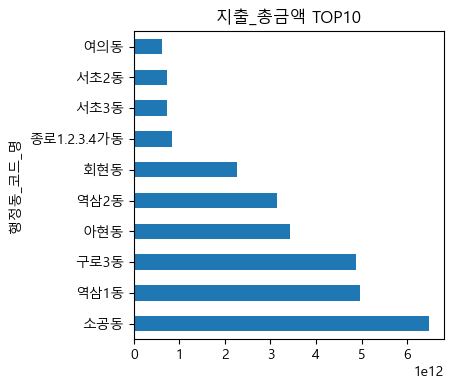

In [19]:
# 지출_총금액 TOP10
col[0].plot.barh(figsize=(4,4), title='지출_총금액 TOP10')
plt.show()

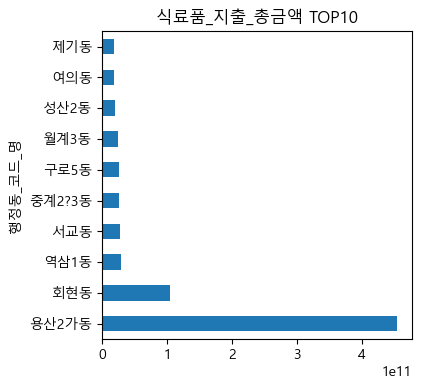

In [20]:
# 식료품_지출_총금액 TOP10
col[1].plot.barh(figsize=(4,4), title='식료품_지출_총금액 TOP10')
plt.show()

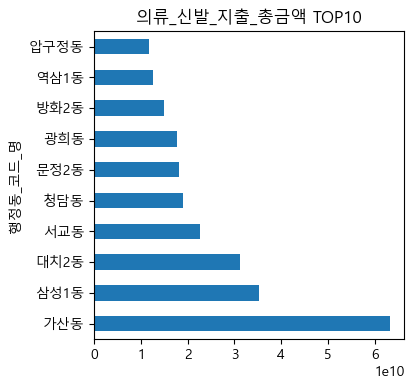

In [21]:
# 의류_신발_지출_총금액 TOP10
col[2].plot.barh(figsize=(4,4), title='의류_신발_지출_총금액 TOP10')
plt.show()

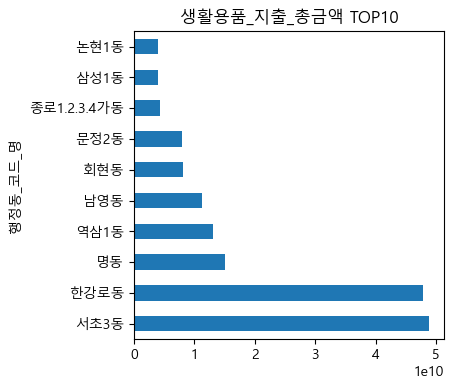

In [22]:
# 생활용품_지출_총금액 TOP10
col[3].plot.barh(figsize=(4,4), title='생활용품_지출_총금액 TOP10')
plt.show()

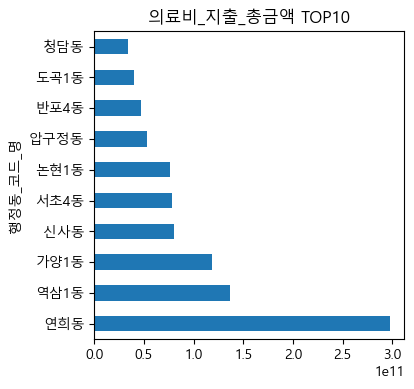

In [23]:
# 의료비_지출_총금액 TOP10
col[4].plot.barh(figsize=(4,4), title='의료비_지출_총금액 TOP10')
plt.show()

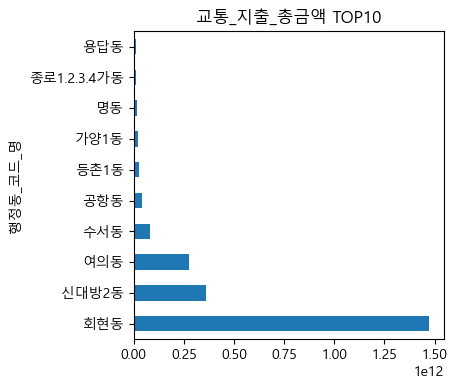

In [24]:
# 교통_지출_총금액 TOP10
col[5].plot.barh(figsize=(4,4), title='교통_지출_총금액 TOP10')
plt.show()

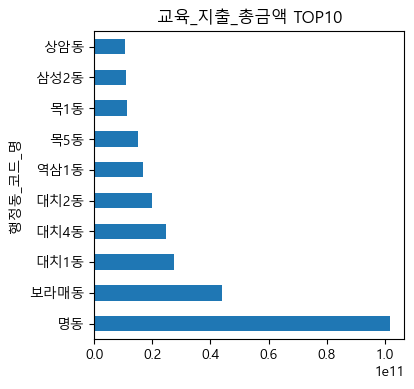

In [25]:
# 교육_지출_총금액 TOP10
col[6].plot.barh(figsize=(4,4), title='교육_지출_총금액 TOP10')
plt.show()

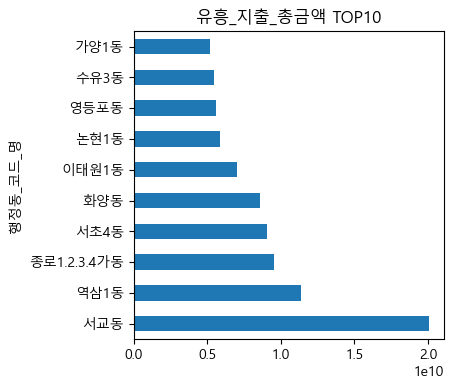

In [26]:
# 유흥_지출_총금액 TOP10
col[7].plot.barh(figsize=(4,4), title='유흥_지출_총금액 TOP10')
plt.show()

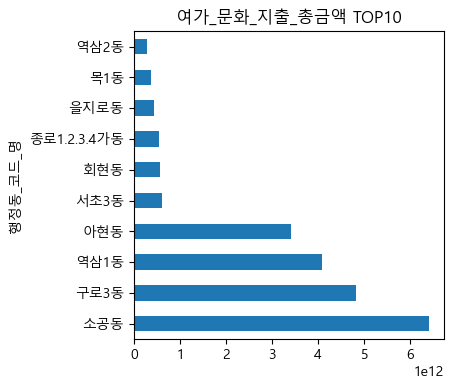

In [27]:
# 여가_문화_지출_총금액 TOP10
col[8].plot.barh(figsize=(4,4), title='여가_문화_지출_총금액 TOP10')
plt.show()

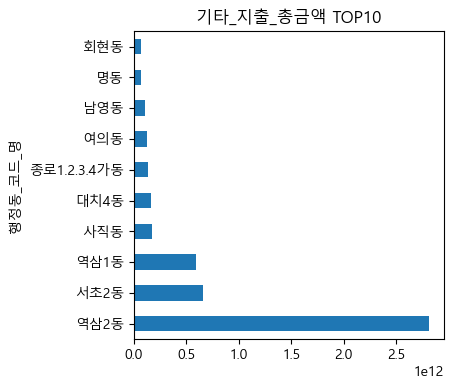

In [28]:
# 기타_지출_총금액 TOP10
col[9].plot.barh(figsize=(4,4), title='기타_지출_총금액 TOP10')
plt.show()

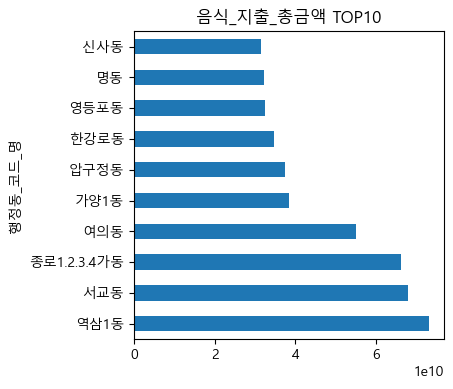

In [29]:
# 음식_지출_총금액 TOP10
col[10].plot.barh(figsize=(4,4), title='음식_지출_총금액 TOP10')
plt.show()

In [44]:
# 음식 지출 총 금액 TOP10 값 추출
group_pay['음식_지출_총금액'].nlargest(10)

행정동_코드_명
역삼1동           73150462000
서교동            67965307000
종로1.2.3.4가동    66105822000
여의동            54944800000
가양1동           38404972000
압구정동           37383788000
한강로동           34661231000
영등포동           32492910000
명동             32233285000
신사동            31478920000
Name: 음식_지출_총금액, dtype: int64

In [45]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['도곡2동']

9141680000

In [46]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['삼성1동']

22377090000

In [47]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['화곡1동']

10791956000

In [50]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['진관동']

11131663000

In [52]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['역촌동']

6433152000

In [53]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['양재1동']

12376459000

In [54]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['신정3동']

2464370000

In [55]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['길동']

11180153000

In [56]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['서교동']

67965307000

In [57]:
# 인구분석 TOP5 음식 지출 총 금액 추출
group_pay['음식_지출_총금액']['북아현동']

1550349000

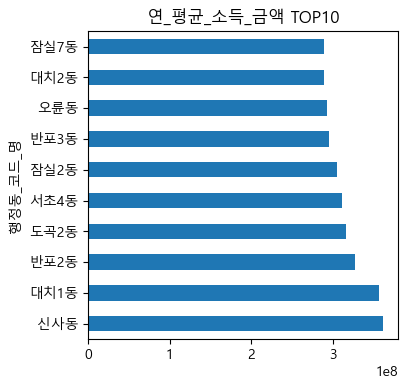

In [30]:
# 연_평균_소득_금액 TOP10
col[11].plot.barh(figsize=(4,4), title='연_평균_소득_금액 TOP10')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------

### 분기 기준

In [31]:
# columns별 TOP10뽑기
col=[]
columns = ['월_평균_소득_금액', '지출_총금액', '식료품_지출_총금액',
       '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액',
       '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액']
for i in columns:
    col.append(pay1[i].nlargest(10))
col

[47      7421305
 634     7421305
 1268    7421305
 1691    7421305
 259     6812331
 537     6812331
 1265    6812331
 1643    6812331
 262     6567504
 635     6567504
 Name: 월_평균_소득_금액, dtype: int64,
 1       1677876423000
 1419    1652368496000
 708     1607096116000
 1062    1542622363000
 1370    1325841478000
 999     1306037855000
 1515    1297083518000
 1142    1220239237000
 540     1217598630000
 463     1191008014000
 Name: 지출_총금액, dtype: int64,
 954     119152426000
 710     113451836000
 220     111356118000
 1277    110702080000
 754      27156662000
 907      27143479000
 1605     26431472000
 371      23922419000
 999       7905082000
 540       7650522000
 Name: 식료품_지출_총금액, dtype: int64,
 1457    19948906000
 464     16945397000
 1104    13204745000
 250     13088203000
 476     10238602000
 892      9713987000
 1644     9374531000
 593      9064366000
 997      8907383000
 1369     8510704000
 Name: 의류_신발_지출_총금액, dtype: int64,
 556     14138502000
 98      1344930800

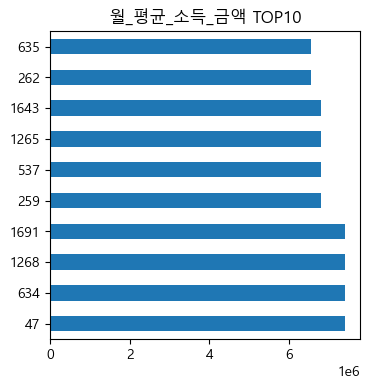

In [32]:
# 월_평균_소득_금액 TOP10(분기단위)
col[0].plot.barh(figsize=(4,4), title='월_평균_소득_금액 TOP10')
plt.show()

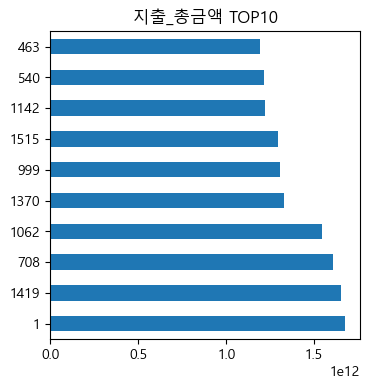

In [33]:
# 지출_총금액 TOP10(분기단위)
col[1].plot.barh(figsize=(4,4), title='지출_총금액 TOP10')
plt.show()

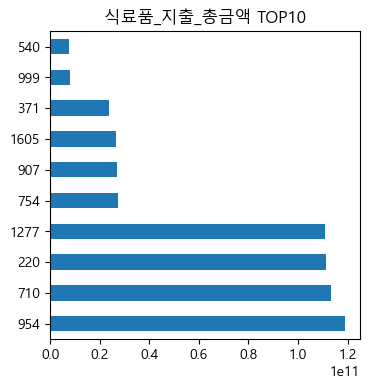

In [34]:
# 식료품_지출_총금액 TOP10(분기단위)
col[2].plot.barh(figsize=(4,4), title='식료품_지출_총금액 TOP10')
plt.show()

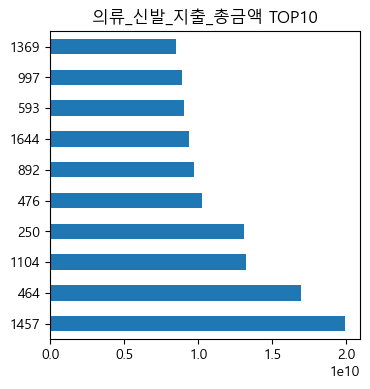

In [35]:
# 의류_신발_지출_총금액 TOP10(분기단위)
col[3].plot.barh(figsize=(4,4), title='의류_신발_지출_총금액 TOP10')
plt.show()

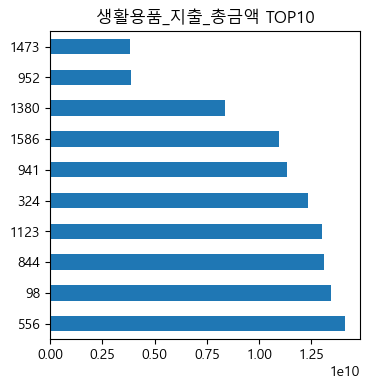

In [36]:
# 생활용품_지출_총금액 TOP10(분기단위)
col[4].plot.barh(figsize=(4,4), title='생활용품_지출_총금액 TOP10')
plt.show()

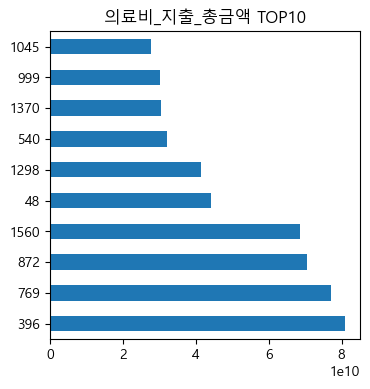

In [37]:
# 의료비_지출_총금액 TOP10(분기단위)
col[5].plot.barh(figsize=(4,4), title='의료비_지출_총금액 TOP10')
plt.show()

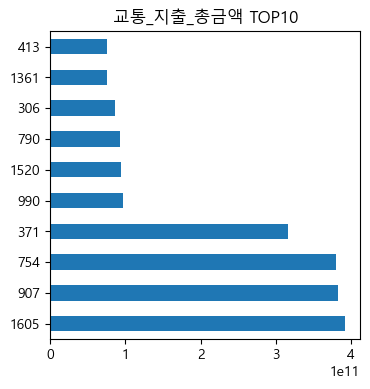

In [38]:
# 교통_지출_총금액 TOP10(분기단위)
col[6].plot.barh(figsize=(4,4), title='교통_지출_총금액 TOP10')
plt.show()

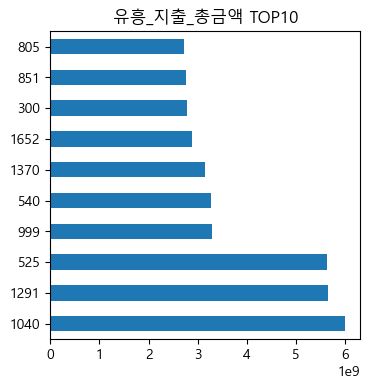

In [39]:
# 유흥_지출_총금액 TOP10(분기단위)
col[8].plot.barh(figsize=(4,4), title='유흥_지출_총금액 TOP10')
plt.show()

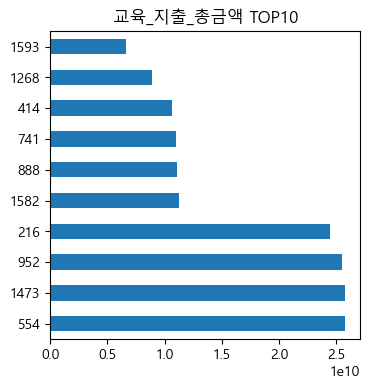

In [40]:
# 교육_지출_총금액 TOP10(분기단위)
col[7].plot.barh(figsize=(4,4), title='교육_지출_총금액 TOP10')
plt.show()

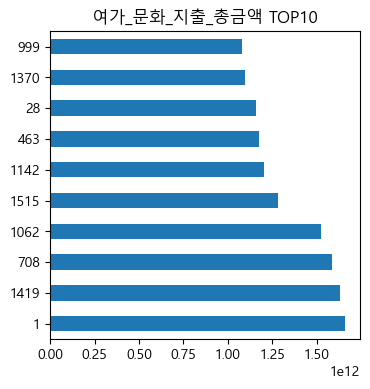

In [41]:
# 여가_문화_지출_총금액 TOP10(분기단위)
col[9].plot.barh(figsize=(4,4), title='여가_문화_지출_총금액 TOP10')
plt.show()

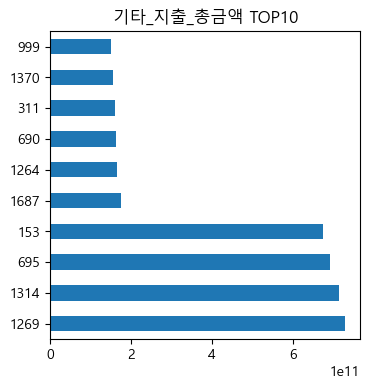

In [42]:
# 기타_지출_총금액 TOP10(분기단위)
col[10].plot.barh(figsize=(4,4), title='기타_지출_총금액 TOP10')
plt.show()

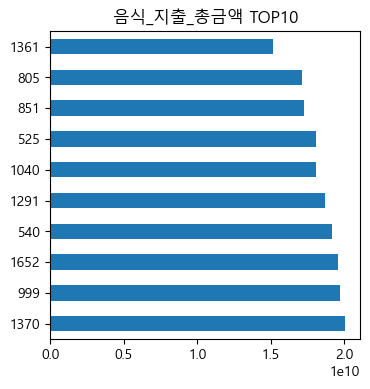

In [43]:
# 음식_지출_총금액 TOP10(분기단위)
col[11].plot.barh(figsize=(4,4), title='음식_지출_총금액 TOP10')
plt.show()